In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply RandomOversampler

#### Using Imbalance Only

In [3]:
Xover, yover = random_oversample(X, y; ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.6301284079514171, 0.5466054557064257, 0.12897177983538477, 0.8892332330408234, 0.2601876747805505, 0.9153753178220317, 0.5441482812064661, 0.1852783785870693, 0.5441482812064661, 0.5466054557064257], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.3933312404451116, 0.3012982513702701, 0.4479438784027816, 0.19272132336206282, 0.5693791212655085, 0.2787942224536374, 0.019763528714939915, 0.22170985093210338, 0.019763528714939915, 0.3012982513702701], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.1122621811440753

#### Using MLJ

In [4]:
naive_model = RandomOversampler(ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(naive_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.6301284079514171, 0.5466054557064257, 0.12897177983538477, 0.8892332330408234, 0.2601876747805505, 0.9153753178220317, 0.5441482812064661, 0.1852783785870693, 0.5441482812064661, 0.5466054557064257], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.3933312404451116, 0.3012982513702701, 0.4479438784027816, 0.19272132336206282, 0.5693791212655085, 0.2787942224536374, 0.019763528714939915, 0.22170985093210338, 0.019763528714939915, 0.3012982513702701], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.1122621811440753

#### Using TableTransforms

In [5]:
naive_model_t = RandomOversampler_t(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> naive_model_t

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


(Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.6301284079514171, 0.5466054557064257, 0.12897177983538477, 0.8892332330408234, 0.2601876747805505, 0.9153753178220317, 0.5441482812064661, 0.1852783785870693, 0.5441482812064661, 0.5466054557064257],
 Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.3933312404451116, 0.3012982513702701, 0.4479438784027816, 0.19272132336206282, 0.5693791212655085, 0.2787942224536374, 0.019763528714939915, 0.22170985093210338, 0.019763528714939915, 0.3012982513702701],
 Column3 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.061489791166806085, 0.4

### 3. Plot the Results

In [7]:
checkbalance(y)

UndefVarError: UndefVarError: checkbalance not defined

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/Manifest.toml`


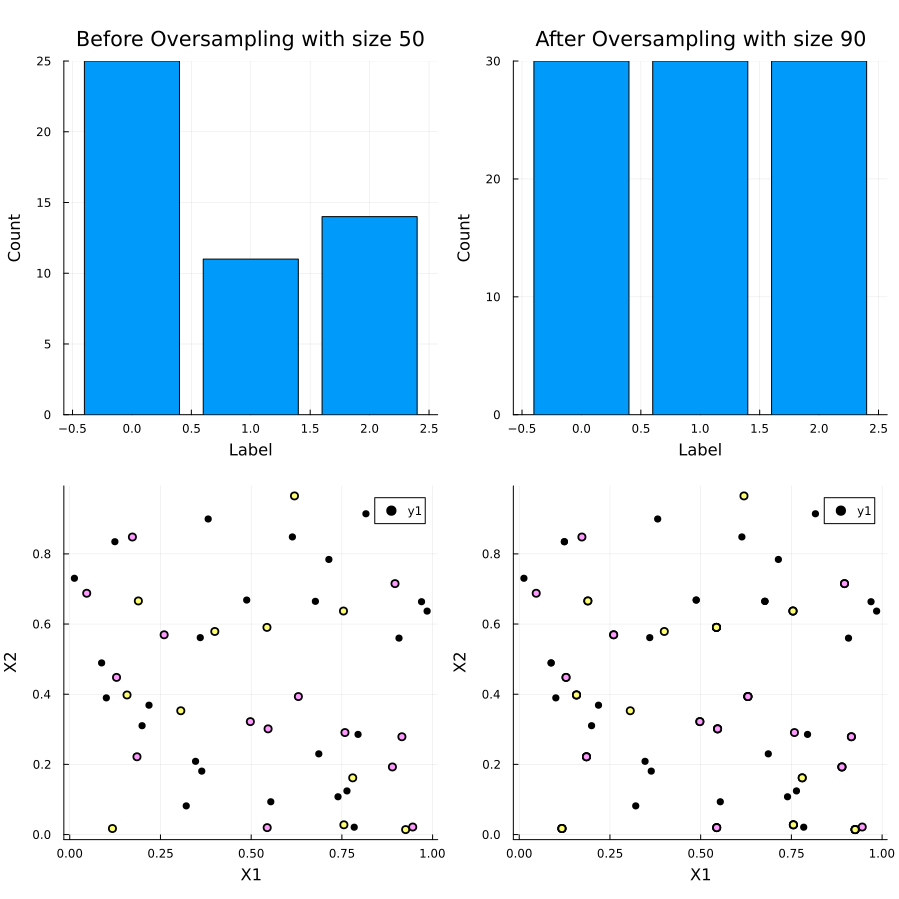

In [6]:
include("plot.jl")
plot_data(y, yover, X, Xover)